In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker


In the above equations, θ is the astrometric signal of a planet. If we take the mass of the planet to be “mp” orbiting a star with mass “m⋆” and assume a circular orbit and that mp ≪ m⋆. At a distance “d” from the observer and a radius “a,” the astrometric signal, θ equals...

signal = 3 micro-as * (m_p/m_earth)*(m_star/m_sun)^(-2/3)*(P/year)^(2/3)*(d/pc)^(-1)

In [14]:
planets = [r'M$_{\rm Earth}$, P$_{\rm Earth}$ / 10', r'M$_{\rm Earth}$, P$_{\rm Earth}$', r'M$_{\rm Earth}$, 10 P$_{\rm Earth}$',  r'M$_{\rm Jupiter}$, P$_{\rm Jupiter}$ / 10', r'M$_{\rm Jupiter}$, P$_{\rm Jupiter}$', r'M$_{\rm Jupiter}$, 10 P$_{\rm Jupiter}$']
colors = ['#366537', '#366537', '#366537', '#db372b', '#db372b', '#db372b']
linestyles = ['dotted', 'solid', 'dashed', 'dotted', 'solid', 'dashed']
m_p = [1, 1, 1, 317.83, 317.83, 317.83]
period_astrometry = [.1, 1, 10, 1.9, 11.9, 111.9]
distance = np.linspace(.1, 1000, 1000)
m_s = 1




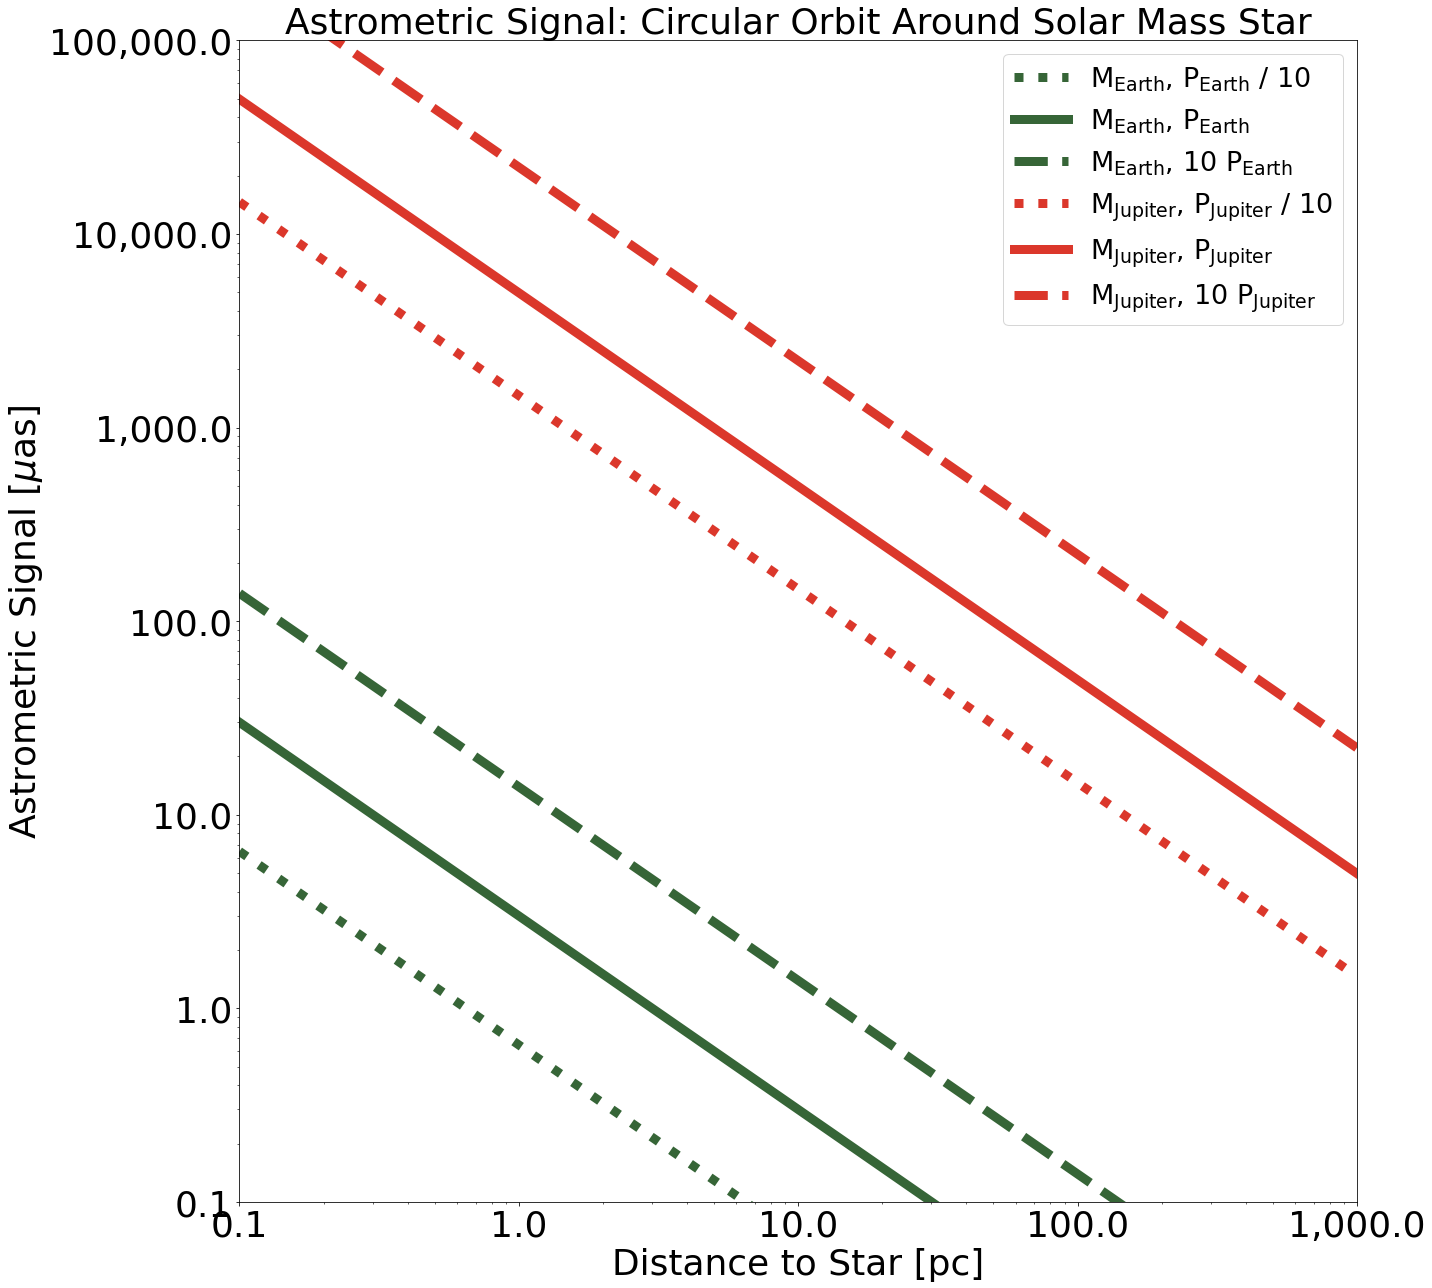

In [15]:
fig, ax = plt.subplots(figsize = [20, 18])
astrom_signals = []
for ii in range(0, len(planets)):
    astrometric_signal = 3 * (m_p[ii])*(m_s)**(-2/3)*(period_astrometry[ii])**(2/3)*(distance)**(-1)
    astrom_signals.append(astrometric_signal)
    plt.plot(distance, astrometric_signal, color = colors[ii], linewidth = 9, label = planets[ii], linestyle = linestyles[ii])

plt.yscale('log')
plt.xscale('log')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

plt.ylim(.1, 100000)
plt.xlim(.1, 1000)
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
plt.title('Astrometric Signal: Circular Orbit Around Solar Mass Star', fontsize = 36)
plt.ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 36)
plt.xlabel('Distance to Star [pc]', fontsize = 36)
plt.legend(fontsize = 27)

plt.tight_layout()
plt.savefig('./figures/astrometric_signal.pdf')
plt.show()

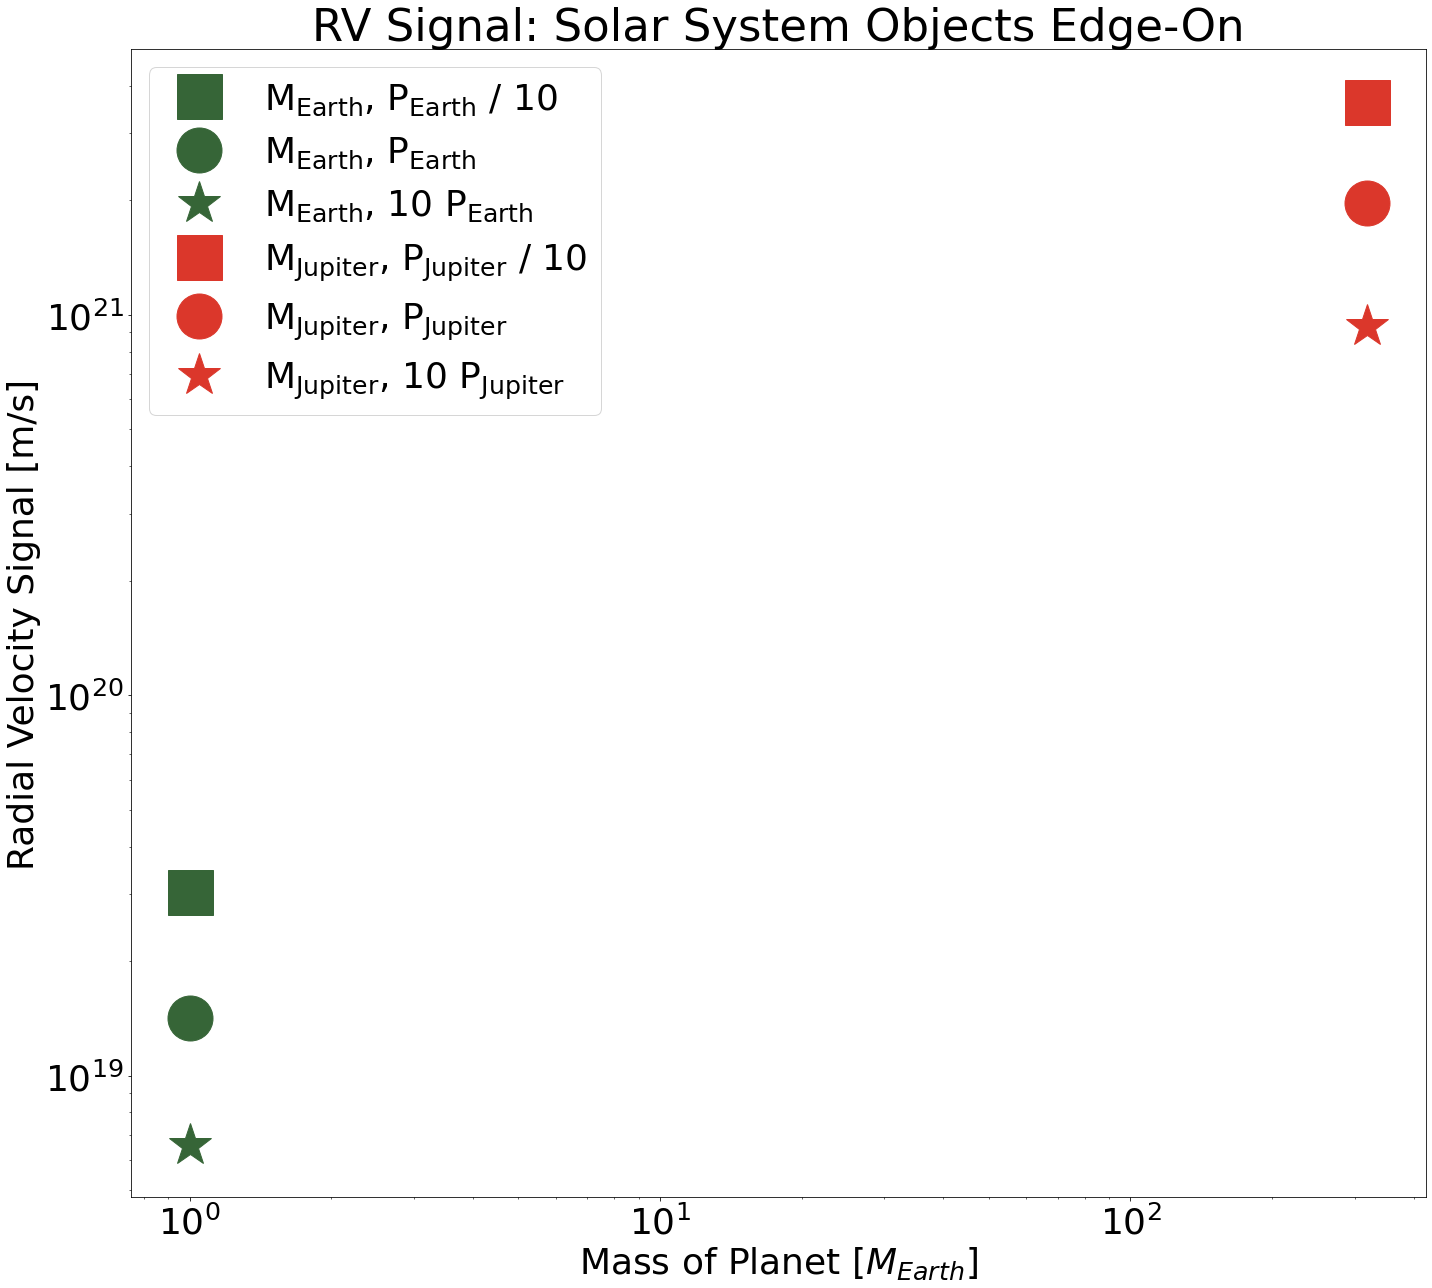

In [16]:
fig, ax = plt.subplots(figsize = [20, 18])
mRV_planet = np.array(m_solar_system)/(5.97*10**24)

RV_signals = []
for ii in range(0, len(planets)):
    K_solar_system = ((2*np.pi*G) / (periodRV[ii]))**(1/3) * (m_solar_system[ii]*np.sin(np.radians(inclination))/(m_s)**(2/3))*(1/(np.sqrt(1-ecc[ii]**2)))
    RV_signals.append(K_solar_system)
    plt.plot(mRV_planet[ii], K_solar_system, 'o', markersize = 45, color = colors[ii], label = planets[ii], marker = markers[ii])
    

plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
plt.legend(fontsize = 36, loc=2)
plt.title('RV Signal: Solar System Objects Edge-On', fontsize = 45)
plt.ylabel(r'Radial Velocity Signal [m/s]', fontsize = 36)
plt.xlabel(r'Mass of Planet [$M_{Earth}$]', fontsize = 36)
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.savefig('./figures/rv_signal.pdf')
plt.show()

/Users/Danielyahalomi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


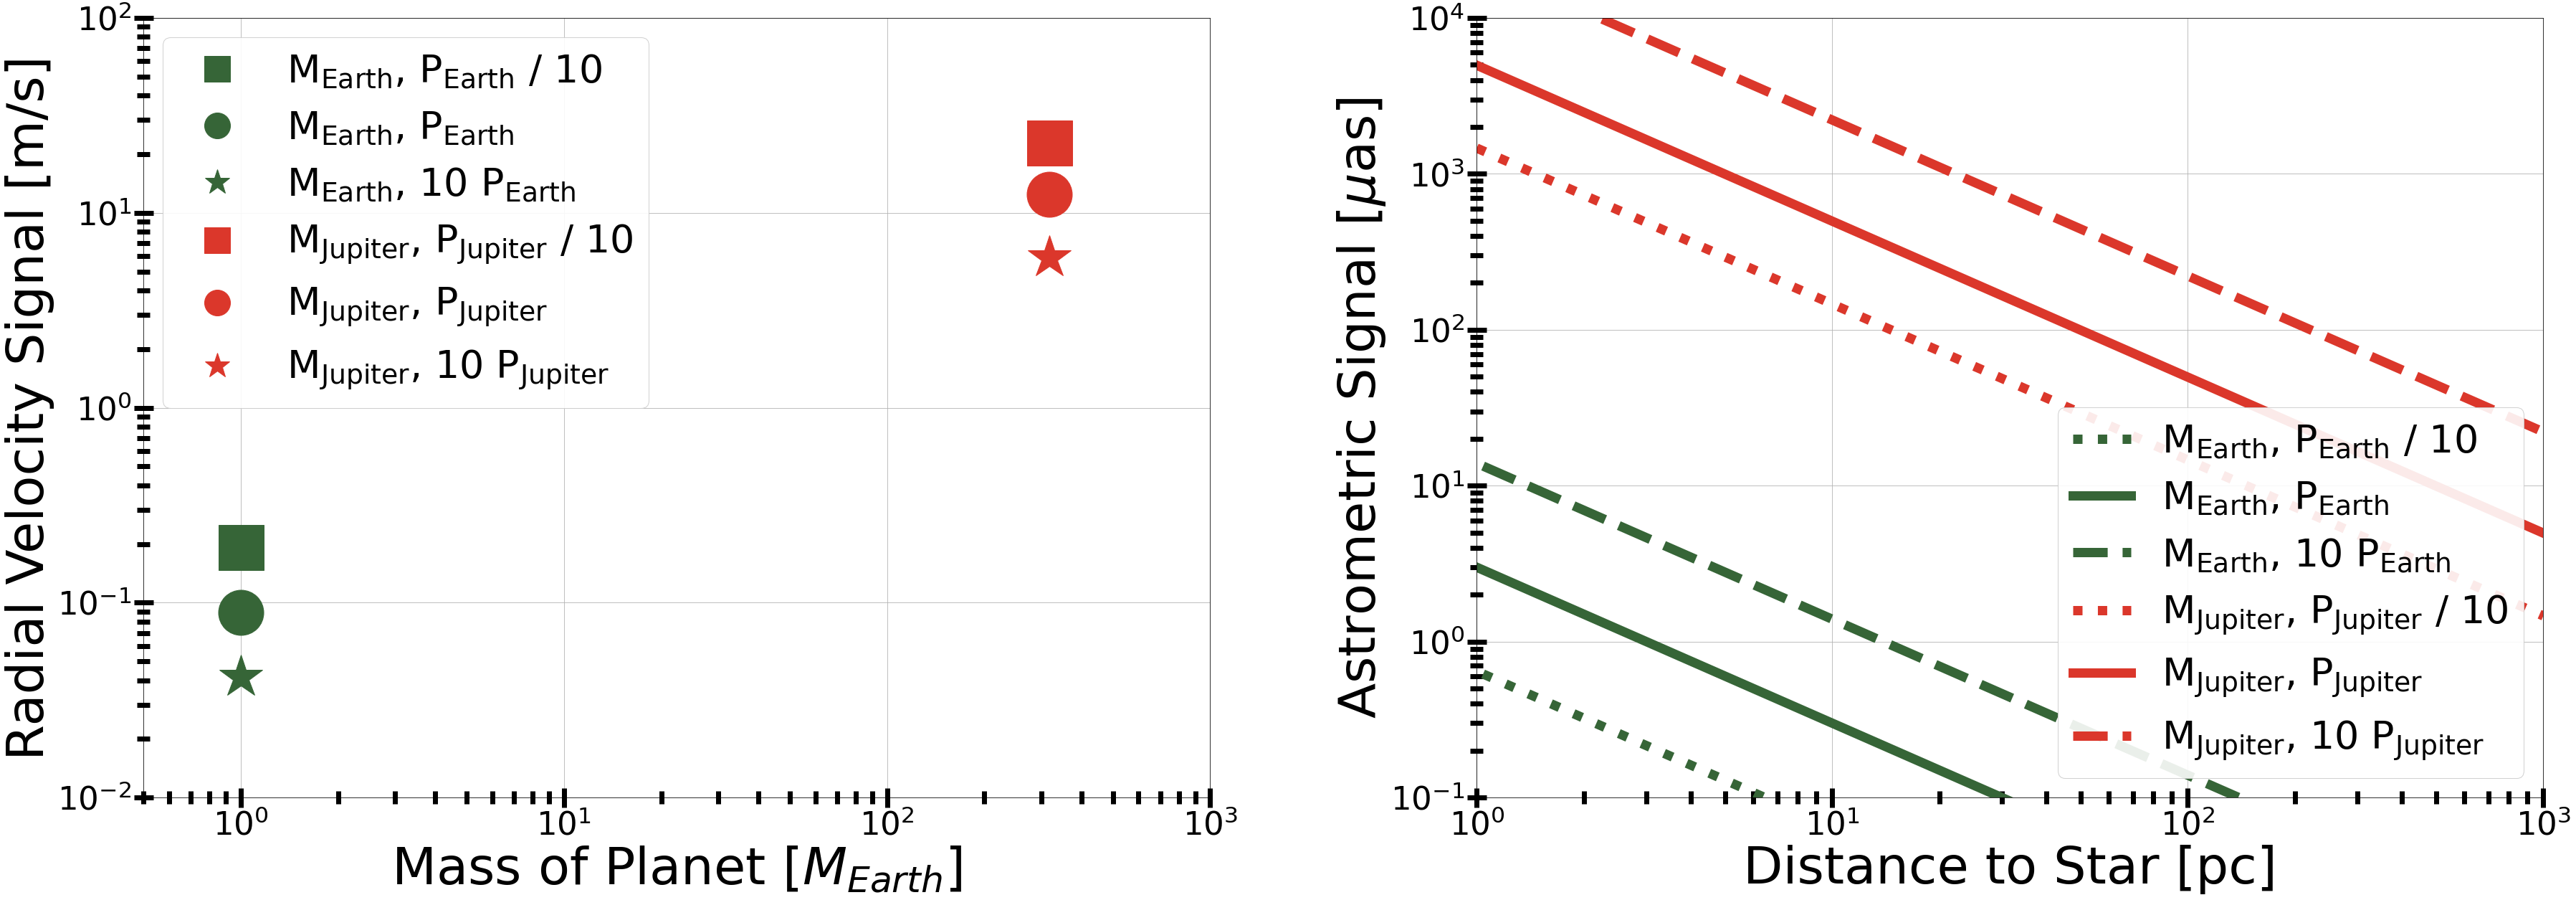

In [12]:
fig, ax = plt.subplots(1, 2, figsize = [60, 20])
fig.subplots_adjust(wspace=.25)
matplotlib.rc('xtick', labelsize=54) 
matplotlib.rc('ytick', labelsize=54) 

for ii in range(0, len(planets)):
    ax[0].plot(mRV_planet[ii], RV_signals[ii], 'o', markersize = 63, color = colors[ii], label = planets[ii], marker = markers[ii])
    ax[1].plot(distance, astrom_signals[ii], color = colors[ii], linewidth = 13, label = planets[ii], linestyle = linestyles[ii])



lgnd = ax[0].legend(fontsize = 54, framealpha = 0.9)
for ii in range(0, len(planets)):
    lgnd.legendHandles[ii]._legmarker.set_markersize(36)

#ax[0].set_title('RV Signal: Solar System Objects Edge-On', fontsize = 45)
ax[0].set_xlim(0.5, 1000)
ax[0].set_ylim(0.01, 100)
ax[0].set_ylabel(r'Radial Velocity Signal [m/s]', fontsize = 72)
ax[0].set_xlabel(r'Mass of Planet [$M_{Earth}$]', fontsize = 72)
ax[0].loglog()
ax[0].tick_params(axis='both', which='major', direction = 'inout', length = 27, width = 7)
ax[0].tick_params(axis='both', which='minor', direction = 'inout', length = 18, width = 7)
ax[0].grid(True)






ax[1].loglog()
ax[1].set_ylim(.1, 10000)
ax[1].set_xlim(1, 1000)
#ax[1].set_title('Astrometric Signal: Circular Orbit Around Solar Mass Star', fontsize = 45)
ax[1].set_ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 72)
ax[1].set_xlabel('Distance to Star [pc]', fontsize = 72)

ax[1].legend(loc = 4, fontsize = 54, framealpha = 0.9, handlelength = 1.5)

ax[1].tick_params(axis='both', which='major', direction = 'inout', length = 27, width = 7)
ax[1].tick_params(axis='both', which='minor', direction = 'inout', length = 18, width = 7)
ax[1].grid(True) 


fig.savefig('./final_figures/envelope_calculations.pdf')
fig.show()